In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## EDA

In [5]:
df = pd.read_csv('titanic/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
len(df)

891

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

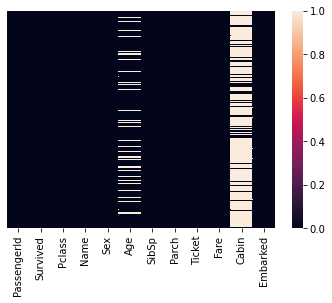

In [10]:
# How many null values and in which column
sns.heatmap(data=df.isnull(), yticklabels=False);

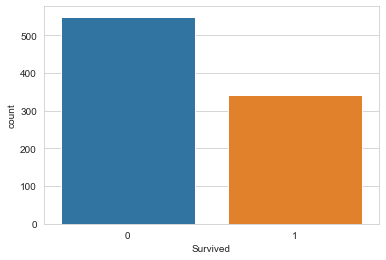

In [11]:
# How many survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df);

<AxesSubplot:xlabel='Survived', ylabel='count'>

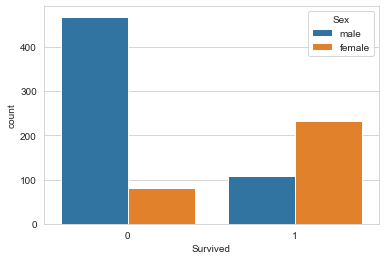

In [12]:
# how many survived based on gender
sns.set_style('whitegrid')
sns.countplot(hue='Sex', x='Survived', data=df)

C:\Users\suhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


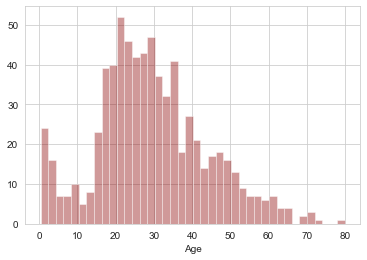

In [13]:
# Age distribution of travellers
sns.distplot(df['Age'].dropna(), kde=False, bins=40, color='darkred');

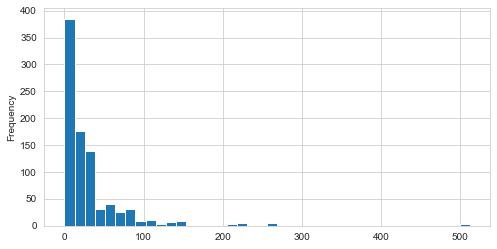

In [14]:
df['Fare'].plot(kind='hist', figsize=(8,4), bins=40);

## Data Cleaning

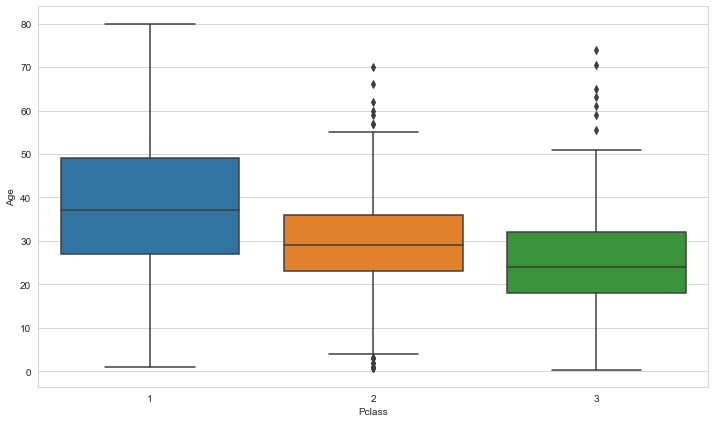

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df);

It implies that passengers of the wealthier class are usually older, hence we will use the averge age values to fill NaN values

In [16]:
def impute_age(cols):
    '''
    fills all the Age column with mean age w.r.t Pclass
    '''
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return age
    
        

In [17]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [18]:
df['Age'].isna().sum()

0

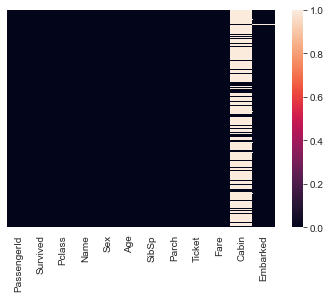

In [19]:
sns.heatmap(df.isnull(), yticklabels=False);

# 'Cabin' has too many NaN values and hence feature engineering on that column is hard, so we drop it

In [20]:
df.drop("Cabin", axis=1, inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


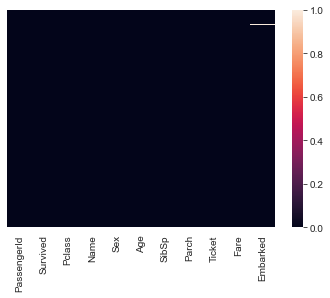

In [22]:
sns.heatmap(df.isnull(), yticklabels=False);

In [23]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
df['Embarked'].dropna(inplace=True)

In [25]:
len(df)

891

In [26]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [27]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [28]:
df.drop(['PassengerId', 'Name', 'Sex', 'Embarked'], axis=1, inplace=True)

In [29]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,0,3,22.0,1,0,A/5 21171,7.2500
1,1,1,38.0,1,0,PC 17599,71.2833
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,35.0,1,0,113803,53.1000
4,0,3,35.0,0,0,373450,8.0500


In [30]:
# Add the edited sex and embarked columns to df

In [31]:
df = pd.concat([df, sex, embark], axis=1)

In [32]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,35.0,0,0,373450,8.0500,1,0,1


In [33]:
df.drop('Ticket', axis=1, inplace=True)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
# Dependent variable is survival
X = df.drop('Survived', axis=1)

In [36]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [37]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# split dataset into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
len(X_train)

712

In [41]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# create a dictionary of models
models = {
    'logisticRegression': LogisticRegression(),
    'randomForestClassifier': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# create a function to fit and score models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits a model with train data and scores each model with test data and stores in a dictionary.
    '''
    
    np.random.seed(42)
    
    # dict for storing scores of models
    model_score = {}
    
    for name, model in models.items():
        # fit the model with train data
        model.fit(X_train, y_train)

        # store the score of each model in the model_score dict
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [42]:
model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)
model_scores

C:\Users\suhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logisticRegression': 0.8100558659217877,
 'randomForestClassifier': 0.8212290502793296,
 'KNN': 0.7206703910614525}

In [43]:
model_comparison = pd.DataFrame(model_scores, index=['Accuracy'])
model_comparison

,logisticRegression,randomForestClassifier,KNN
Accuracy,0.810056,0.821229,0.72067


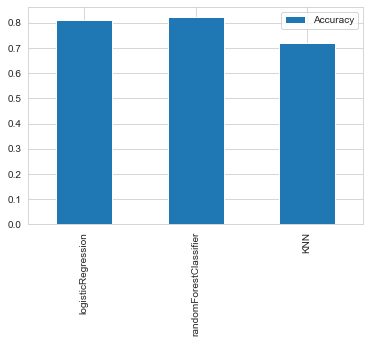

In [44]:
model_comparison.T.plot.bar();

In [45]:
# try knn

train_scores = []
test_scores = []

# create custom params
k_neighbors = range(1,21)

# set up knn instance
knn = KNeighborsClassifier()

# loop through neighbors
for i in k_neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the model with train data
    knn.fit(X_train, y_train)
    
    # score train data
    train_scores.append(knn.score(X_train, y_train))
    
    # score test data
    test_scores.append(knn.score(X_test, y_test))

In [46]:
train_scores

[0.9789325842696629,
 0.8356741573033708,
 0.8342696629213483,
 0.7991573033707865,
 0.7851123595505618,
 0.7570224719101124,
 0.7570224719101124,
 0.7443820224719101,
 0.7528089887640449,
 0.75,
 0.7443820224719101,
 0.7317415730337079,
 0.7317415730337079,
 0.7289325842696629,
 0.7331460674157303,
 0.7303370786516854,
 0.7317415730337079,
 0.7317415730337079,
 0.7317415730337079,
 0.7247191011235955]

In [47]:
test_scores

[0.7039106145251397,
 0.6983240223463687,
 0.7430167597765364,
 0.7318435754189944,
 0.7206703910614525,
 0.7206703910614525,
 0.7374301675977654,
 0.7206703910614525,
 0.7150837988826816,
 0.7262569832402235,
 0.7486033519553073,
 0.7374301675977654,
 0.7541899441340782,
 0.7541899441340782,
 0.7486033519553073,
 0.7374301675977654,
 0.7486033519553073,
 0.7430167597765364,
 0.7430167597765364,
 0.7206703910614525]

Maximum KNN score on the test data: 75.42%


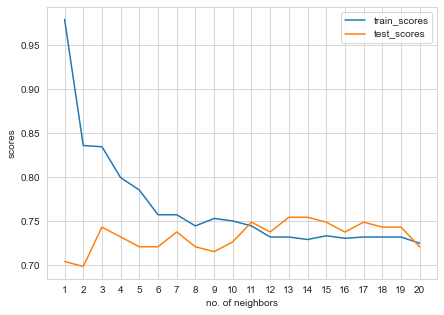

In [48]:
# plot a graph 
plt.figure(figsize=(7,5))
plt.plot(k_neighbors, train_scores, label='train_scores')
plt.plot(k_neighbors, test_scores, label='test_scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('no. of neighbors')
plt.ylabel('scores')
plt.legend();
print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')


## Hypertuning using RandomizedSearchCV

In [49]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ['liblinear']
}

# create a hyperparameter grid for RandomizedSearchCV
rf_grid = {
    'n_estimators': np.arange(1, 1000,  50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}


In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# tune the logistic regression model
lr_model = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              verbose=True,
                              n_iter=20,
                              random_state=42)

# fit this model with train data
lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [51]:
lr_model.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [52]:
lr_model.score(X_test, y_test)

0.7988826815642458

In [53]:
# tune the random forest classifier
rfc_model = RandomizedSearchCV(RandomForestClassifier(),
                               verbose=True,
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20)

# fit the model with train data
rfc_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])},
                   verbose=True)

In [54]:
rfc_model.best_params_

{'n_estimators': 751,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [55]:
rfc_model.score(X_test, y_test)

0.8100558659217877

In [56]:
model_scores

{'logisticRegression': 0.8100558659217877,
 'randomForestClassifier': 0.8212290502793296,
 'KNN': 0.7206703910614525}

## Hypertuning using GridCV

In [57]:
# done for random forest

# create a hyperparameter grid for GridCV
rf_grid = {
    'n_estimators': np.arange(745, 755,  2),
    'max_depth': [10],
    'min_samples_split': [15, 16, 17],
    'min_samples_leaf': np.arange(1, 20, 5)
}

# set up GridCV for random forest
rfc_grid_model = GridSearchCV(RandomForestClassifier(),
                              verbose=True,
                              param_grid=rf_grid,
                              cv=5)

# fit the model
rfc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10],
                         'min_samples_leaf': array([ 1,  6, 11, 16]),
                         'min_samples_split': [15, 16, 17],
                         'n_estimators': array([745, 747, 749, 751, 753])},
             verbose=True)

In [59]:
rfc_grid_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'n_estimators': 751}

In [60]:
rfc_grid_model.score(X_test, y_test)

0.8100558659217877

In [61]:
model_scores

{'logisticRegression': 0.8100558659217877,
 'randomForestClassifier': 0.8212290502793296,
 'KNN': 0.7206703910614525}

In [62]:
# The default settings show the best accuracy
clf = RandomForestClassifier().fit(X_train, y_train)

In [63]:
# make predictions
y_preds = clf.predict(X_test)
y_preds[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [65]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

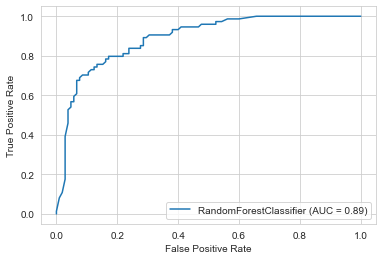

In [68]:
# plotting the ROC curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf,
               X_test,
               y_test);

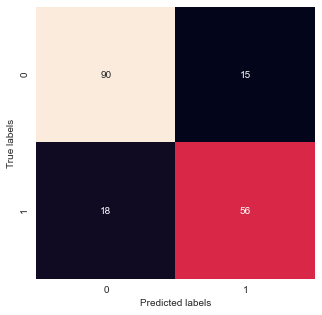

In [78]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True,
            cbar=False);

plt.xlabel("Predicted labels")
plt.ylabel("True labels");

In [81]:
# Classification report 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [98]:
# evaluation using cross-validation
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')

np.mean(cv_acc)

0.8114493754315486

In [99]:
# for precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')

np.mean(cv_acc)

0.8114493754315486

In [100]:
# for recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')

np.mean(cv_acc)

0.8114493754315486

In [101]:
# for f1 score
cv_f1_score = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')

np.mean(cv_acc)

0.8114493754315486

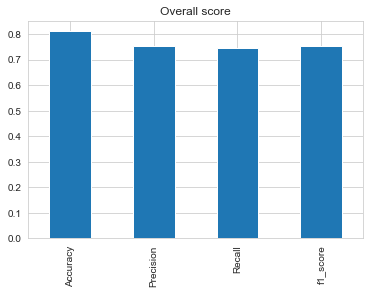

In [103]:
# Visualising the scores
cv_metrics = pd.DataFrame({ 'Accuracy': np.mean(cv_acc),
                            'Precision': np.mean(cv_precision),
                            'Recall': np.mean(cv_recall),
                            'f1_score': np.mean(cv_f1_score)}, 
                           index=[0])

cv_metrics.T.plot.bar(title='Overall score', 
                    legend=False);